## Steps

1. Get frequency of every word accross vocab
2. Find count in both the clusters
3. Phir har sentence ka hot/cold score nikaalo and predict on that basis ki wo Hindi hai ya English


In [110]:
# define a function to count the number of words in a text
def count_words(text):
    return len(text.split())

In [3]:
import re
import string
import pandas as pd
from functools import reduce
from math import log
from nltk import FreqDist
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [4]:
all_text = ""
with open(r"data.txt") as f:
    all_text = f.read()

In [5]:
all_text = all_text.split("\n")[1:-1]

In [6]:
len(all_text)

100000

## Preprocessing and tokenizing
Firstly, we must bring every chars to lowercase and remove all punctuation, because it's not important for our task, but is very harmful for clustering algorithm. 
After that, we'll split strings to array of words.

In [7]:
def preprocess_text(text: str) -> str:
    # remove links
    text = re.sub(r"http\S+", "", text)
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", text)
    text = text.lower().strip()
    return text

In [8]:
filelist =["0.csv", "1.csv"]
#read them into pandas
df_list = [pd.read_csv(file) for file in filelist]
#concatenate them together
df1 = pd.concat(df_list)


In [9]:
df1 = df1.drop(["Unnamed: 0"], axis=1)
df1.reset_index(drop=True, inplace=True)



In [10]:
df1

,text,cluster
0,"Respected Sir &amp; Madam,I have applied for t...",0
1,"Dear Prime Minister,What I am asking for is th...",0
2,"Dear Prime Minister, I have enclosed a data sh...",0
3,"Hello Sir,I am Mr. Kishor Punamchand Dave aged...",0
4,"To, Our Respected and Hon&#39;ble Prime M...",0
...,...,...
99990,Shri Pradhanmantri Narendra Modi ji Meri aapse...,1
99991,Modi ji up me rojgar ka bhaout bura haal hai a...,1
99992,sar mein ek bahut chhote se gaon ka Rahane wal...,1
99993,Sirr plzz request aa ssc gd 2018 all medical f...,1


In [11]:
df1['text_tc'] = df1["text"].apply(preprocess_text)
df1['text_tc'] = df1["text_tc"].apply(lambda x: x.split())



In [12]:
df1

,text,cluster,text_tc
0,"Respected Sir &amp; Madam,I have applied for t...",0,"[respected, sir, amp, madam, i, have, applied,..."
1,"Dear Prime Minister,What I am asking for is th...",0,"[dear, prime, minister, what, i, am, asking, f..."
2,"Dear Prime Minister, I have enclosed a data sh...",0,"[dear, prime, minister, i, have, enclosed, a, ..."
3,"Hello Sir,I am Mr. Kishor Punamchand Dave aged...",0,"[hello, sir, i, am, mr, kishor, punamchand, da..."
4,"To, Our Respected and Hon&#39;ble Prime M...",0,"[to, our, respected, and, hon, ble, prime, min..."
...,...,...,...
99990,Shri Pradhanmantri Narendra Modi ji Meri aapse...,1,"[shri, pradhanmantri, narendra, modi, ji, meri..."
99991,Modi ji up me rojgar ka bhaout bura haal hai a...,1,"[modi, ji, up, me, rojgar, ka, bhaout, bura, h..."
99992,sar mein ek bahut chhote se gaon ka Rahane wal...,1,"[sar, mein, ek, bahut, chhote, se, gaon, ka, r..."
99993,Sirr plzz request aa ssc gd 2018 all medical f...,1,"[sirr, plzz, request, aa, ssc, gd, all, medica..."


In [13]:
vocab = {}
word_dist = FreqDist()
for s in df1.text_tc:
    word_dist.update(s)

vocab = dict(word_dist)


In [15]:
clusters = 2


In [16]:
sum = 0
for i in range(clusters):
    sum+=len(df1[df1.cluster == i])

sum == len(df1)

True

In [17]:
lst = [list(df1[df1.cluster == i]['text_tc'].values) for i in range(clusters)]

In [22]:
vocab_lst = []

for cluster in lst:
    tmp = {}
    word_dist = FreqDist()
    for s in cluster:
        word_dist.update(s)
    vocab_lst.append(dict(word_dist))
        

In [23]:
perc_dict = {}

In [24]:

for word in vocab:
    t = []
    tot = vocab[word]
    for c in range(clusters):
#// print(c[word])
        try:
            t.append(round(vocab_lst[c][word]*100/tot, 4))
        except:
            t.append(0)
    perc_dict[word] = t
    
    

In [25]:
perc_dict

{'respected': [96.8427, 3.1573],
 'sir': [83.6216, 16.3784],
 'amp': [97.505, 2.495],
 'madam': [96.6473, 3.3527],
 'i': [99.1185, 0.8815],
 'have': [99.5934, 0.4066],
 'applied': [99.6263, 0.3737],
 'for': [99.4643, 0.5357],
 'the': [99.5533, 0.4467],
 'pm': [86.8672, 13.1328],
 'housing': [92.0237, 7.9763],
 'scheme': [97.4816, 2.5184],
 'app': [69.6738, 30.3262],
 'current': [98.7996, 1.2004],
 'situation': [99.0031, 0.9969],
 'raw': [97.1098, 2.8902],
 'material': [97.6127, 2.3873],
 'prices': [99.8102, 0.1898],
 'are': [99.4277, 0.5723],
 'increased': [98.4848, 1.5152],
 'if': [99.7015, 0.2985],
 'you': [98.8179, 1.1821],
 'can': [99.7114, 0.2886],
 'process': [97.3377, 2.6623],
 'this': [99.6989, 0.3011],
 'request': [96.0818, 3.9182],
 'as': [99.4249, 0.5751],
 'soon': [99.0479, 0.9521],
 'possible': [99.0526, 0.9474],
 'am': [98.6058, 1.3942],
 'depending': [100.0, 0],
 'on': [99.1795, 0.8205],
 'policy': [97.3509, 2.6491],
 'basement': [96.0, 4.0],
 'has': [99.4639, 0.5361],
 

In [26]:
len (perc_dict)

238851

In [289]:
# [(word, vocab[word]) for word in perc_dict if min(perc_dict[word])>10]    


### The next target is to calculate an average sentence score

In [27]:
def build(lst: list):
    if len(lst)<1:
        return (0, 0)
    eng_score, hind_score = 0.0, 0.0
    for item in lst:
        eng_score+=perc_dict[item][0]
        hind_score+=perc_dict[item][1]
    return (eng_score/len(lst), hind_score/len(lst))
    
    

In [30]:
df1[df1['text_tc'].map(lambda d: len(d)) > 0]
df1.reset_index(drop=True, inplace=True)
df1

,text,cluster,text_tc
0,"Respected Sir &amp; Madam,I have applied for t...",0,"[respected, sir, amp, madam, i, have, applied,..."
1,"Dear Prime Minister,What I am asking for is th...",0,"[dear, prime, minister, what, i, am, asking, f..."
2,"Dear Prime Minister, I have enclosed a data sh...",0,"[dear, prime, minister, i, have, enclosed, a, ..."
3,"Hello Sir,I am Mr. Kishor Punamchand Dave aged...",0,"[hello, sir, i, am, mr, kishor, punamchand, da..."
4,"To, Our Respected and Hon&#39;ble Prime M...",0,"[to, our, respected, and, hon, ble, prime, min..."
...,...,...,...
99990,Shri Pradhanmantri Narendra Modi ji Meri aapse...,1,"[shri, pradhanmantri, narendra, modi, ji, meri..."
99991,Modi ji up me rojgar ka bhaout bura haal hai a...,1,"[modi, ji, up, me, rojgar, ka, bhaout, bura, h..."
99992,sar mein ek bahut chhote se gaon ka Rahane wal...,1,"[sar, mein, ek, bahut, chhote, se, gaon, ka, r..."
99993,Sirr plzz request aa ssc gd 2018 all medical f...,1,"[sirr, plzz, request, aa, ssc, gd, all, medica..."


In [31]:
df1['eng_hin_score_avg'] = df1.text_tc.apply(build)

In [32]:
df1.head()

,text,cluster,text_tc,eng_hin_score_avg
0,"Respected Sir &amp; Madam,I have applied for t...",0,"[respected, sir, amp, madam, i, have, applied,...","(97.94162500000004, 2.0583749999999994)"
1,"Dear Prime Minister,What I am asking for is th...",0,"[dear, prime, minister, what, i, am, asking, f...","(98.38446325301206, 1.6155367469879511)"
2,"Dear Prime Minister, I have enclosed a data sh...",0,"[dear, prime, minister, i, have, enclosed, a, ...","(98.46647692307693, 1.5335230769230768)"
3,"Hello Sir,I am Mr. Kishor Punamchand Dave aged...",0,"[hello, sir, i, am, mr, kishor, punamchand, da...","(97.18155683060095, 2.8184431693989076)"
4,"To, Our Respected and Hon&#39;ble Prime M...",0,"[to, our, respected, and, hon, ble, prime, min...","(97.24474501347699, 2.7552549865229117)"


## Initial distribution

In [33]:
my_colors = ['yellow', 'g']

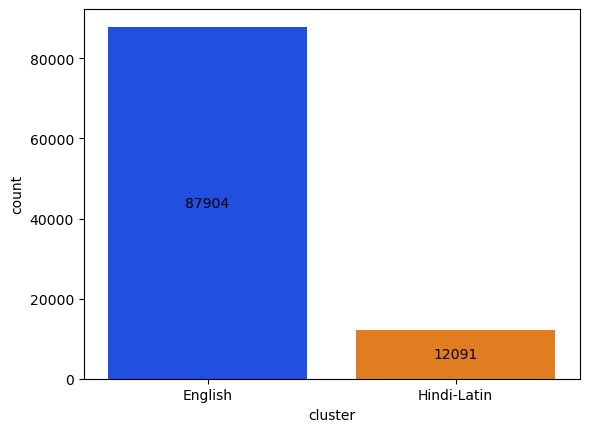

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create the bar chart
ax = sns.countplot(x='cluster', data=df1)

# Set the x-axis tick labels
ax.set_xticklabels(['English', 'Hindi-Latin'])


# Show the values inside the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height() / 2), ha='center', va='center')
# Show the plot
plt.show()


### Now we will re assign the clusters based on the average scores obtained

In [35]:
def reassign(cluster, scores):
    if(cluster==0 and scores[0]>scores[1]):
        return 0
    if(cluster==0 and scores[0]<=scores[1]):
        return 1
    if(cluster==1 and scores[0]<scores[1]):
        return 1
    if(cluster==1 and scores[0]>=scores[1]):
        return 0

In [44]:
df1["cluster_reassign"] = df1[['cluster','eng_hin_score_avg']].apply(lambda x: reassign(*x), axis=1)

In [45]:
df1.columns

Index(['text', 'cluster', 'text_tc', 'eng_hin_score_avg', 'cluster_reassign'], dtype='object')

## Distribution after reassigning

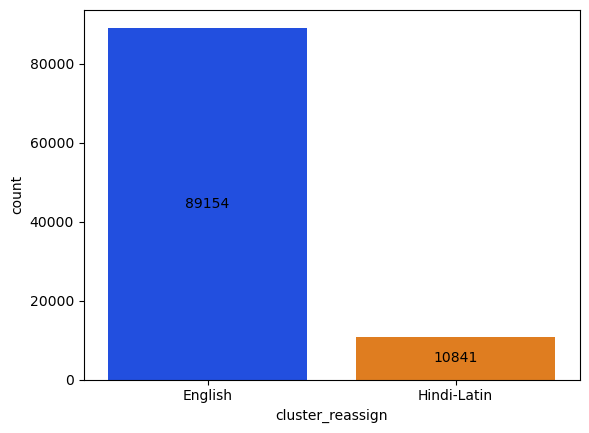

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create the bar chart
ax = sns.countplot(x='cluster_reassign', data=df1)

# Set the x-axis tick labels
ax.set_xticklabels(['English', 'Hindi-Latin'])


# Show the values inside the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height() / 2), ha='center', va='center')
# Show the plot
plt.show()


In [120]:
df1

,text,cluster,text_tc,eng_hin_score_avg,cluster_reassign
0,"Respected Sir &amp; Madam,I have applied for t...",0,"[respected, sir, amp, madam, i, have, applied,...","(97.94162500000004, 2.0583749999999994)",0
1,"Dear Prime Minister,What I am asking for is th...",0,"[dear, prime, minister, what, i, am, asking, f...","(98.38446325301206, 1.6155367469879511)",0
2,"Dear Prime Minister, I have enclosed a data sh...",0,"[dear, prime, minister, i, have, enclosed, a, ...","(98.46647692307693, 1.5335230769230768)",0
3,"Hello Sir,I am Mr. Kishor Punamchand Dave aged...",0,"[hello, sir, i, am, mr, kishor, punamchand, da...","(97.18155683060095, 2.8184431693989076)",0
4,"To, Our Respected and Hon&#39;ble Prime M...",0,"[to, our, respected, and, hon, ble, prime, min...","(97.24474501347699, 2.7552549865229117)",0
...,...,...,...,...,...
99990,Shri Pradhanmantri Narendra Modi ji Meri aapse...,1,"[shri, pradhanmantri, narendra, modi, ji, meri...","(23.70210980392157, 76.29789019607844)",1
99991,Modi ji up me rojgar ka bhaout bura haal hai a...,1,"[modi, ji, up, me, rojgar, ka, bhaout, bura, h...","(34.39654999999999, 65.60345000000004)",1
99992,sar mein ek bahut chhote se gaon ka Rahane wal...,1,"[sar, mein, ek, bahut, chhote, se, gaon, ka, r...","(27.36336764705882, 72.63663235294116)",1
99993,Sirr plzz request aa ssc gd 2018 all medical f...,1,"[sirr, plzz, request, aa, ssc, gd, all, medica...","(49.60179811320753, 50.39820188679244)",1


,Before,After,Description
62,0,1,"Sir,Ssc gd 2018 all medical fit ka joining diy..."
68,0,1,Hello sir Shradheo Naredra modi ji.mujhe upse ...
1481,0,1,Respected PM Narendra Modi Sir . Pehle meri na...
2877,0,1,Dear sir mai government job me reforms chahta ...
3686,0,1,Respected sir Main Mukesh tanwar rajgarh Ka rh...
...,...,...,...
85511,0,1,Honorable Prime Minister sir Sir meri ek wish ...
85743,0,1,Shree prime minister ji uttar pradesh ko order...
86216,0,1,Governent ache se work Q nhi kr rhi. Muje to a...
86450,0,1,Respected sir prime minister plz hath jod kr v...


In [124]:
r_hl = df1[((df1.cluster_reassign==1)&(df1.cluster==0))][["cluster", "cluster_reassign","text"]]
r_hl = r_hl.astype(str)
# r_hl = r_hl.iloc[:10, :]
# apply the function to each row in the DataFrame
word_counts = r_hl.apply(lambda row: count_words(row['text']), axis=1)

# select only the rows with less than 50 words
r_hl = r_hl.loc[word_counts < 100]

# define a dictionary of mappings
mappings = {'0':"English", '1':"Hindi-Latin"}

# use the replace() function to replace the values
r_hl['cluster'] = r_hl['cluster'].replace(mappings)
r_hl['cluster_reassign'] = r_hl['cluster_reassign'].replace(mappings)
r_hl.columns = ["Before", "After", "Description"]

r_hl.to_csv("tmp.csv", index = False)

In [125]:
r_hl



,Before,After,Description
62,English,Hindi-Latin,"Sir,Ssc gd 2018 all medical fit ka joining diy..."
68,English,Hindi-Latin,Hello sir Shradheo Naredra modi ji.mujhe upse ...
2877,English,Hindi-Latin,Dear sir mai government job me reforms chahta ...
4246,English,Hindi-Latin,Rani ki pension March 2019 se rook ke rakhi ha...
5187,English,Hindi-Latin,https://health.economictimes.indiatimes.com/l....
...,...,...,...
85511,English,Hindi-Latin,Honorable Prime Minister sir Sir meri ek wish ...
85743,English,Hindi-Latin,Shree prime minister ji uttar pradesh ko order...
86216,English,Hindi-Latin,Governent ache se work Q nhi kr rhi. Muje to a...
86450,English,Hindi-Latin,Respected sir prime minister plz hath jod kr v...


In [88]:
# set the page limit for text truncation
page_limit = 50

# iterate over each column in the dataframe and truncate the text
for col in r_hl.columns:
    r_hl[col] = r_hl[col].apply(lambda x: x[:page_limit] + '...' if len(x) > page_limit else x)

# convert the dataframe to a LaTeX table format
table = r_hl.to_latex(index=False)

/var/folders/l5/zcj92b893vgf436v51kmcvqh0000gn/T/ipykernel_39613/625952844.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table = reassign_hindi_to_english.to_latex(index=False)


In [89]:
table

'\\begin{tabular}{lll}\n\\toprule\ncluster & cluster\\_reassign &                                               text \\\\\n\\midrule\n      1 &                0 & We are heirs to Stridhan properties of late Kot... \\\\\n      1 &                0 & Sir namaskaraalu  Mana Bharat Desh Aane Ki Meer... \\\\\n      1 &                0 & Respected PM sir,       I am Amar Singh Patel ,... \\\\\n      1 &                0 & Plz my father is admitted and as per hospital r... \\\\\n      1 &                0 & sir       ssc gd 2018 ka vacancy aaya tha isme ... \\\\\n      1 &                0 & NamaskarDo acknowledge the below comment from C... \\\\\n      1 &                0 & Namastey our honourable PM Narendra Modi Sir.Fa... \\\\\n      1 &                0 & Finance Fraud and fake document visa. videsh bh... \\\\\n      1 &                0 & Modi ji aaj kl to lock down hai to study nahi h... \\\\\n      1 &                0 & Sahara India me sahara credit cooperative socie... \\\\\n\\bott